In [51]:
import pandas as pd
import numpy as np
dat = r"C:\Users\steph\Downloads\encoded_df.csv"
df = pd.read_csv(dat)

# Split data

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
headers = list(df.columns)
exc= ['id', 'relDate', 'minute']
print(headers)
ind_var= [x for x in headers if x not in exc]
print(ind_var)
dep_var = ["minute"]
df['bin_min'] = [0]*17313
for (x,y) in enumerate(df['minute']):
    if y>120:
        df.loc[x,'bin_min']= 1
    else:
        df.loc[x,'bin_min']=0
print(df['bin_min'])   
x = df[ind_var]
y = df[dep_var]
print(x)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

['id', 'date', 'minute', 'rating', 'relDate', 'relCountry_Argentina', 'relCountry_Australia', 'relCountry_Brazil', 'relCountry_Canada', 'relCountry_China', 'relCountry_Czechia', 'relCountry_Denmark', 'relCountry_France', 'relCountry_Germany', 'relCountry_Greece', 'relCountry_Hong Kong', 'relCountry_India', 'relCountry_Italy', 'relCountry_Japan', 'relCountry_Mexico', 'relCountry_Netherlands', 'relCountry_Philippines', 'relCountry_Poland', 'relCountry_Portugal', 'relCountry_Russian Federation', 'relCountry_South Korea', 'relCountry_Spain', 'relCountry_Sweden', 'relCountry_Switzerland', 'relCountry_Turkey', 'relCountry_UK', 'relCountry_USA', 'type_Digital', 'type_Premiere', 'type_TV', 'type_Theatrical', 'type_Theatrical limited', 'studio_20th Century Fox', 'studio_ARD', 'studio_ARTE', 'studio_ARTE France Cinéma', 'studio_American Mutoscope & Biograph', 'studio_BBC', 'studio_BFI', 'studio_BR', 'studio_CNC', 'studio_Canal+', 'studio_Channel 4 Television', 'studio_Columbia Pictures', 'studio

## Model Linear Regression

In [53]:

model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)
pred = model.predict(x_test)
print(pred)
df_test =x_test
df_test["predictions_linear"]=pred
df_test["actual"]= y_test["minute"]
print(x_test['predictions_linear'])


Coefficients: [[ 2.06215947e-01  7.63226272e+00 -9.18560891e-02 -5.31829403e-01
   6.44003733e-01 -7.87241651e-01  3.02668647e+00 -9.72888252e-01
   2.16141250e+00  3.25739386e+00  4.65626469e+00  1.00091219e-01
   1.56237811e+00  4.89570964e+00  6.47883787e-02  1.18215185e+00
   4.21708734e-01  5.19440292e-01 -1.63677467e+00 -5.31775852e-01
   1.28975324e+00 -1.09375237e+00  2.91890928e+00  3.67833949e-01
   1.07980581e+00 -2.40521043e+00 -1.17728234e+00  3.53267695e+00
   1.49732834e+00 -2.08647940e+00  7.64289691e-01  1.93147074e+00
   1.15922592e+01  1.17675311e+00  4.27489714e+00  4.06497610e+00
   3.71488652e-01  1.49750358e+00 -6.10710060e+01  4.86847024e+00
  -1.17232036e+01  3.91340189e+00 -1.86689338e+00  1.24016618e-01
  -6.12198693e+00  1.09081873e+00 -4.10212655e+00 -4.74067602e+00
  -1.21391136e+00  1.43438550e+00  1.05624712e+00  4.65379367e+00
   4.56863194e+00 -5.32031415e+00  4.75077667e+00  6.86263522e+00
   1.06967406e+01 -1.94316019e+00 -3.51119791e+01 -8.26795958e

# Continuous Metrics

In [54]:
def mse(actual,predicted):
    return np.mean((df_test[actual]-df_test[predicted])**2)
    

In [55]:
print(mse("actual" ,"predictions_linear"))

506.18832312429805


In [56]:
def mae(actual,predicted):
    return (abs(df_test[actual]-df_test[predicted])).mean()
    

In [57]:
print(mae("actual","predictions_linear"))

15.5182377995836


# Binary metrics
we need to determine how we will convert rating and predicted rating to binary.

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score
def precision(actual,predicted):
    return precision_score(df[actual],df[predicted])
def recall(actual,predicted):
    return recall_score(df[actual],df[predicted])
def f1(actual,predicted):
    return f1_score(df[actual],df[predicted])

In [59]:
from sklearn.metrics import confusion_matrix
def lift(actual, predicted):
    tn,fp,fn,tp = confusion_matrix(df[actual],df[predicted]).ravel()
    return (tp/(tp+fp))/((tp+fn)/(tp+tn+fp+fn))
    

# Graphs

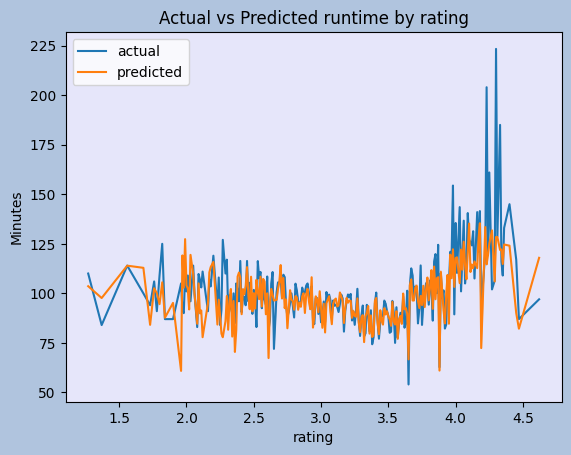

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'rating', y ='actual', label = 'actual', errorbar=('ci', 0))
sns.lineplot(data =df_test, x = 'rating', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by rating")
ax.set(ylabel="Minutes")
plt.show()

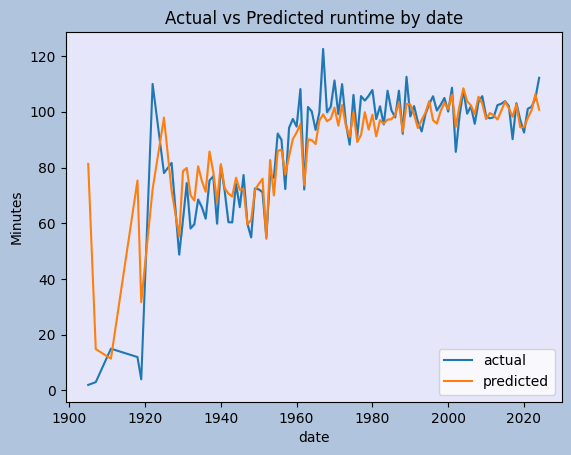

In [61]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'date', y ='actual', label = 'actual', errorbar=('ci', 0))
sns.lineplot(data =df_test, x = 'date', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by date")
ax.set(ylabel="Minutes")
plt.show()

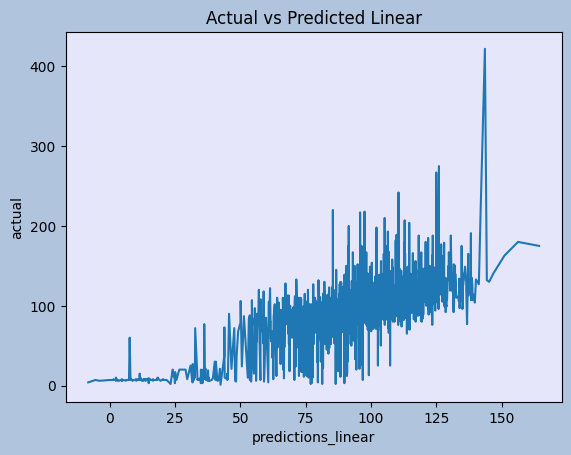

In [62]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
plt.title("Actual vs Predicted Linear")
sns.lineplot(data =df_test, x = 'predictions_linear', y ='actual', errorbar=('ci', 0))
plt.show()

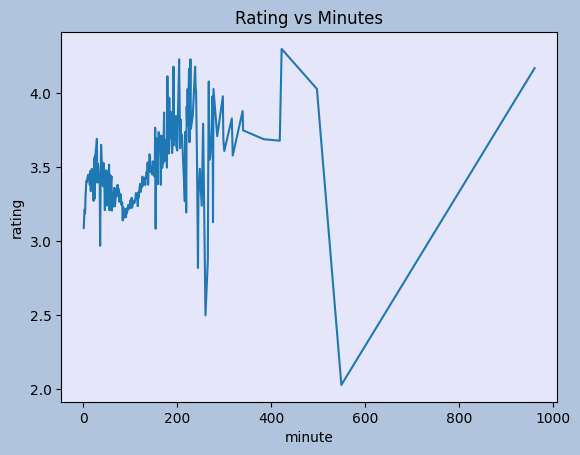

In [63]:

plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df, x = 'minute', y ='rating',errorbar=('ci', 0))
plt.title("Rating vs Minutes")
plt.show()


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

x = df[ind_var]
y = df['bin_min']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
df['Accuracy_bin'] = accuracy
k_values = [i for i in range (1,31)]
scores =[]
scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

c:\Users\steph\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[np.float64(0.8606859708467145), np.float64(0.8705024628602477), np.float64(0.8699265137286089), np.float64(0.870329269409569), np.float64(0.8714273512528999), np.float64(0.87004050244451), np.float64(0.8690590117230046), np.float64(0.8682496801626437), np.float64(0.8690586780812195), np.float64(0.8685961671565362), np.float64(0.8676722630071501), np.float64(0.867383112354038), np.float64(0.8672677390247283), np.float64(0.867209752082467), np.float64(0.8659970142396645), np.float64(0.8668631983602173), np.float64(0.8665167614125926), np.float64(0.8665743813488904), np.float64(0.8664011712161226), np.float64(0.8669785383253485), np.float64(0.8666898881349141), np.float64(0.868018066035383), np.float64(0.8670362583541816), np.float64(0.8680180326712046), np.float64(0.8678448225384369), np.float64(0.8679602625961035), np.float64(0.8673250420013302), np.float64(0.8683067495899959), np.float64(0.8677870357812465), np.float64(0.8685955832834121)]


Text(0, 0.5, 'Accuracy Score')

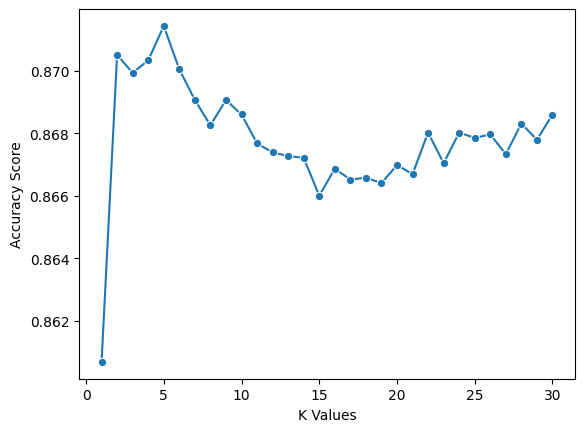

In [91]:
print(scores)
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")



In [98]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average = 'micro')
recall = recall_score(Y_test, y_pred, average = 'micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


c:\Users\steph\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.00028876696505919725
Precision: 0.00028876696505919725
Recall: 0.00028876696505919725
